# 𝗗𝗮𝘆 𝟱: 𝗡𝗲𝘂𝗿𝗮𝗹 𝗡𝗲𝘁𝘄𝗼𝗿𝗸𝘀

**🔍 Algorithm:**

 Inspired by the human brain, it consists of interconnected layers of neurons.

🛠️ Project: **Handwritten Digit Recognition**

## Load the Dataset

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
# Print shapes of the datasets
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")


x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [3]:
# Function to plot images
def plot_images(images, labels, predictions=None):
    plt.figure(figsize=(10, 5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.title(f"Label: {labels[i]}")
        if predictions is not None:
            plt.xlabel(f"Pred: {predictions[i]}")
        plt.axis('off')
    plt.show()

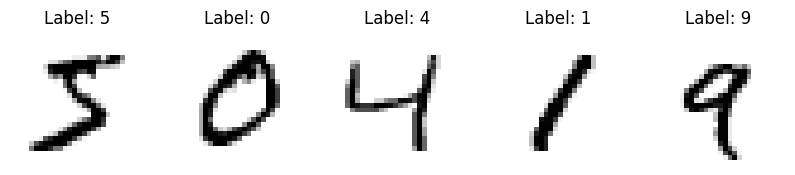

In [4]:
# Visualize some sample images from the training set
plot_images(x_train[:5], y_train[:5])

In [5]:
# Normalize the data to [0, 1] range
x_train = x_train / 255.0
x_test = x_test / 255.0

# Verify the normalization by printing min and max values
print(f"x_train min: {x_train.min()}, max: {x_train.max()}")
print(f"x_test min: {x_test.min()}, max: {x_test.max()}")


x_train min: 0.0, max: 1.0
x_test min: 0.0, max: 1.0


## Build the Neural Network Model

In [6]:
import tensorflow as tf

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the 2D images into 1D
    tf.keras.layers.Dense(128, activation='relu'),   # Fully connected layer with ReLU activation
    tf.keras.layers.Dropout(0.2),                    # Dropout layer to prevent overfitting
    tf.keras.layers.Dense(10, activation='softmax')  # Output layer with 10 units (one for each class)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Train the Model

In [7]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8576 - loss: 0.4770 - val_accuracy: 0.9562 - val_loss: 0.1443
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9555 - loss: 0.1498 - val_accuracy: 0.9700 - val_loss: 0.0972
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9667 - loss: 0.1078 - val_accuracy: 0.9738 - val_loss: 0.0839
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9729 - loss: 0.0867 - val_accuracy: 0.9761 - val_loss: 0.0797
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9779 - loss: 0.0706 - val_accuracy: 0.9782 - val_loss: 0.0674


## Evaluate the Model

In [8]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')


313/313 - 1s - 4ms/step - accuracy: 0.9782 - loss: 0.0674

Test accuracy: 0.9782000184059143


## Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


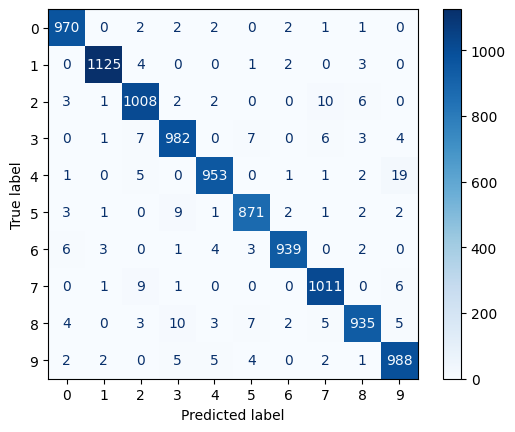

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.97      0.98      0.98      1028
           8       0.98      0.96      0.97       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Predict labels for the test set
y_pred = np.argmax(model.predict(x_test), axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Compute classification report
report = classification_report(y_test, y_pred, target_names=[str(i) for i in range(10)])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(i) for i in range(10)])
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Print the classification report
print("Classification Report:")
print(report)


In [11]:
# Predict labels for the test set
y_pred = np.argmax(model.predict(x_test), axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


## Result Visualization

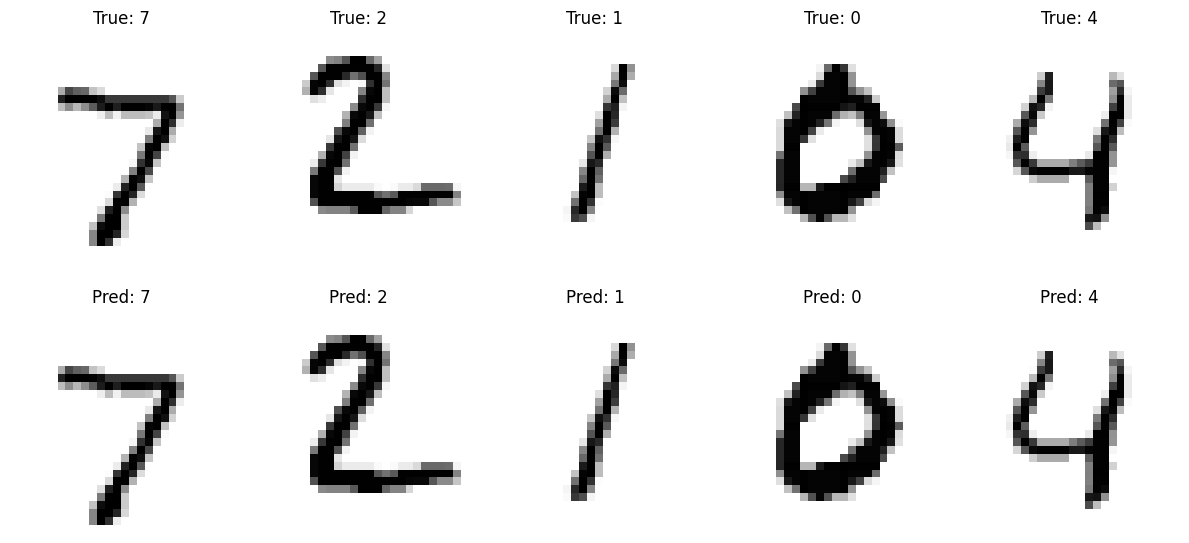

In [12]:
# Function to plot images with actual and predicted labels
def plot_images_with_predictions(images, true_labels, predicted_labels=None):
    plt.figure(figsize=(12, 6))
    for i in range(len(images)):
        plt.subplot(2, len(images), i + 1)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.title(f"True: {true_labels[i]}")
        plt.axis('off')

        if predicted_labels is not None:
            plt.subplot(2, len(images), len(images) + i + 1)
            plt.imshow(images[i], cmap=plt.cm.binary)
            plt.title(f"Pred: {predicted_labels[i]}")
            plt.axis('off')

    plt.tight_layout()
    plt.show()

# Visualize some test images with actual and predicted labels
plot_images_with_predictions(x_test[:5], y_test[:5], y_pred[:5])

## Than You !